# Take grayscale image of size 512x512 and perform the following operations -

(a) Decrease its spatial resolution by half every time and observe its change when displaying in the same window size

(b) Decrease it intensity level resolution by one bit up to reach its binary format observe its change when displaying in the same window size

(c) Illustrate the histogram of the image and make single threshold segmentation observed from the histogram

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt 

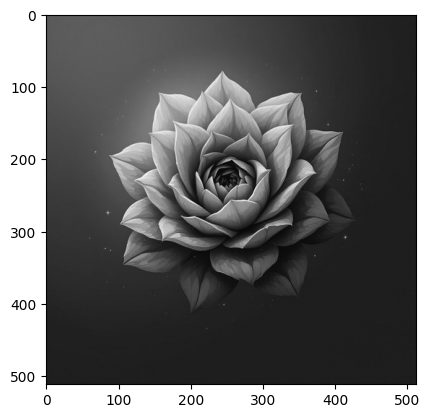

In [2]:
rose = cv.imread("./rose.jpg", cv.IMREAD_GRAYSCALE)
plt.imshow(rose, cmap="gray")

In [3]:
# x = cv.resize(rose, (400, 400))
# print(x.shape)
# print(rose.shape)

In [12]:
# sizes = [(rose.shape[1] // (2 ** i), rose.shape[0] // (2 ** i)) for i in range(6)]

sizes = []
for i in range(6):
    x = rose.shape[0] // (2 ** i)
    y = rose.shape[1] // (2 ** i)
    sizes.append((x, y))

print(sizes)

[(512, 512), (256, 256), (128, 128), (64, 64), (32, 32), (16, 16)]


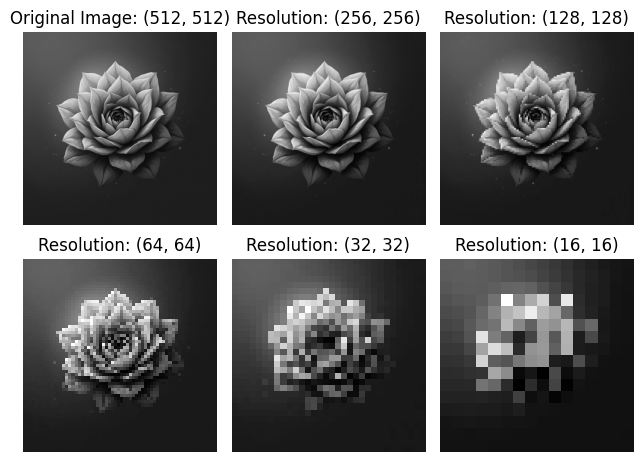

In [15]:
plt.Figure(figsize=(30, 20))

i = 1

for size in (sizes):
    plt.subplot(2, 3, i)
    if i == 1:
        plt.imshow(rose, cmap="gray")
        plt.title(f"Original Image: {size}")
        plt.axis('off')
    else:
        resized = cv.resize(rose, size)
        plt.imshow(resized, cmap="gray")
        plt.title(f"Resolution: {size}")
        plt.axis('off')
    i += 1
plt.tight_layout()
plt.show()

In [23]:
def decrease_intensity_level_resolution(img, bits):
    levels = 2 ** (bits) - 1

    return (img) // levels

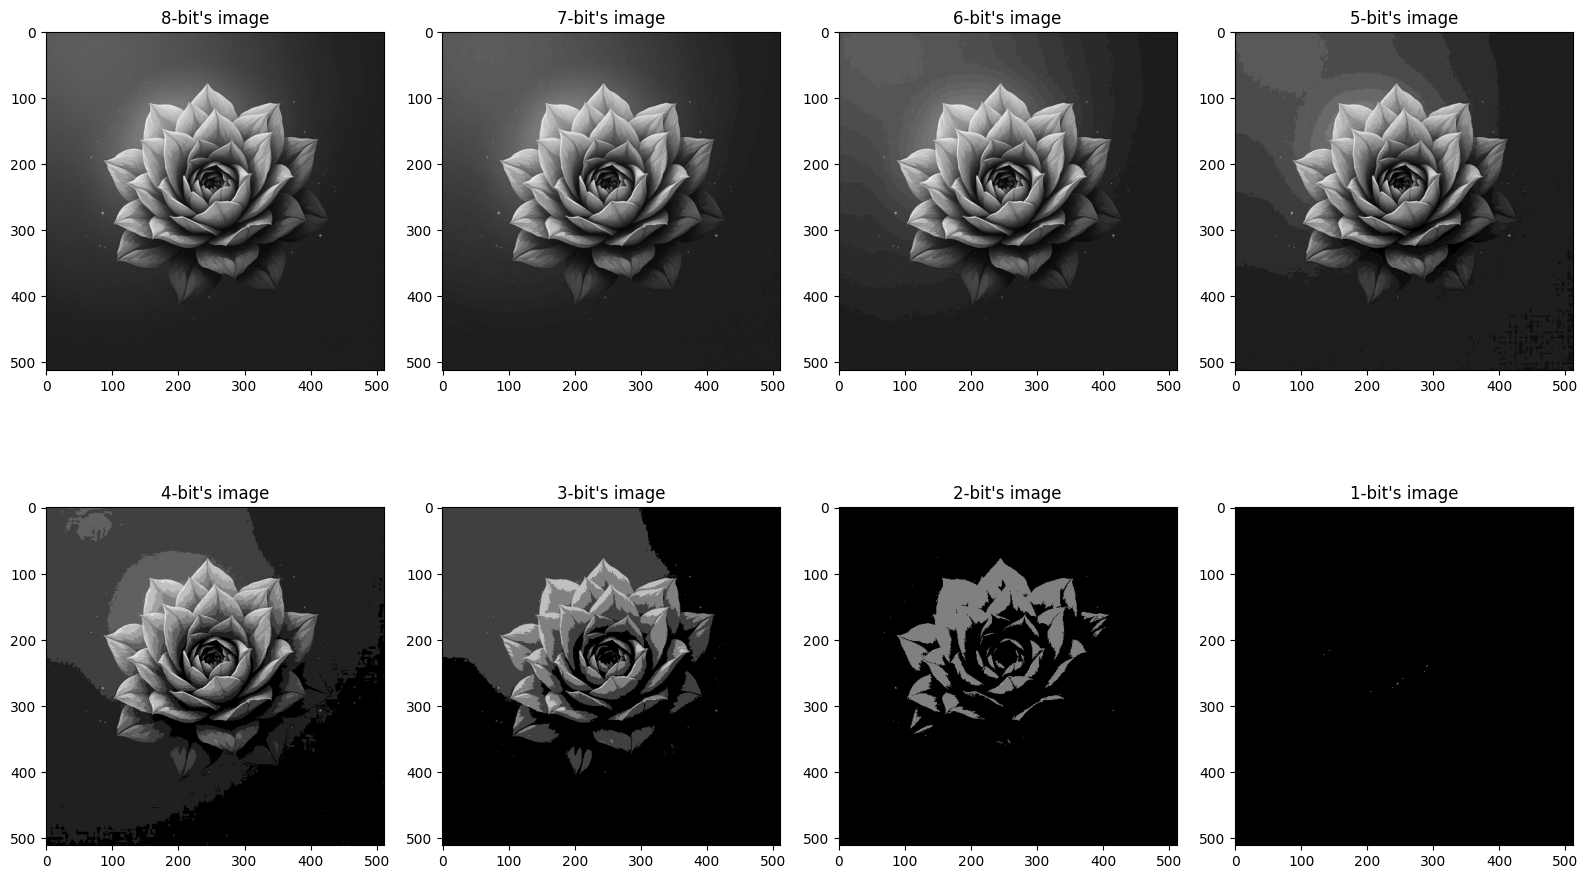

In [26]:
intensity_level_image = rose

plt.figure(figsize=(16, 10))
for i  in range(1, 9):
    plt.subplot(2, 4, i)
    decreased_image = decrease_intensity_level_resolution(intensity_level_image, i)
    plt.imshow(decreased_image, cmap='gray')
    plt.title(f'{9-i}-bit\'s image')
    # plt.axis('off')

plt.tight_layout()
plt.show()

In [8]:
# decreased_image = decrease_intensity_level_resolution(intensity_level, 8)


In [9]:
def hist(img):
    tmp = np.zeros(256)

    h, w = img.shape

    for i in range(h):
        for j in range(w):
            tmp[img[i][j]] += 1
    return tmp

# def imhist(img):
#     tmp = np.zeros(256)
#     for i in range(256):
#         tmp[i] == sum(sum(img == i))
#     return tmp

<BarContainer object of 256 artists>

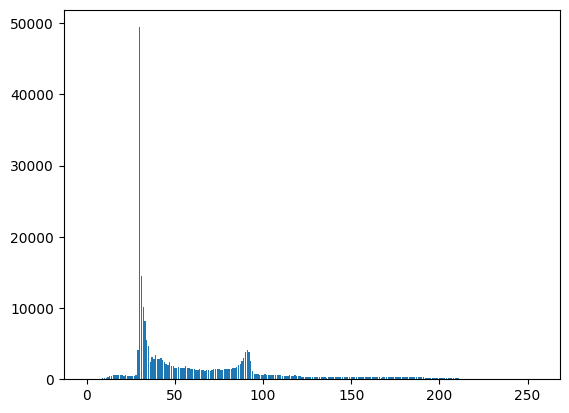

In [27]:
rose_hist = hist(rose)
# print(rose_hist[255])
plt.bar(range(256), rose_hist)

In [33]:
def threshold(img, T):
    return np.where(img > T, 1, 0)

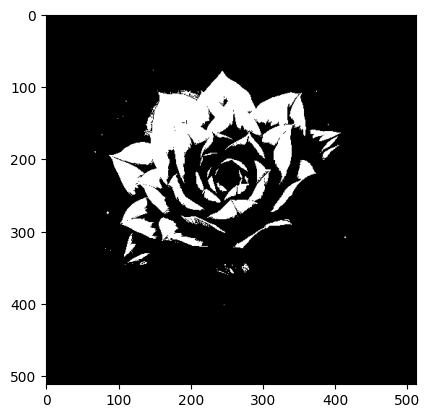

In [40]:
x = threshold(rose, 120)

plt.imshow(x, cmap='gray')